In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os, sys
os.chdir(r"C:\Users\ACER\Desktop\Terragon recruitment\titanic")

In [3]:
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# lets examine our columns and one after the other

In [6]:
# this verifies that we have unique entries.
np.sum(train_set['PassengerId'].isnull())

0

Survived
This represents the column we are to predict or make infrences from. As we all know that
every soul present during the titanic incident either died or lived. This is the column
indicating their survival. The entries within the column are integers (0 or 1).

In [7]:
# this verifies that every entry in the survived column was either a 0 or a 1.
# 0 representing death, and 1 representing survival of the individual.
np.unique(train_set['Survived'])

array([0, 1], dtype=int64)

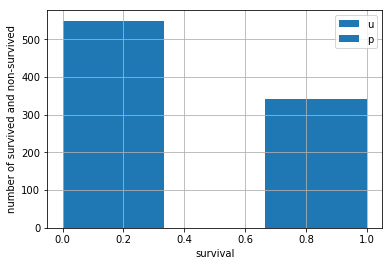

In [8]:
# we can visualize the rate of survival and those who didn't survived. by using pandas.

plt.hist(train_set['Survived'], bins = 3, histtype = 'bar', label = ['survived', 'did not survive'])
plt.grid()
plt.legend('upper right')
plt.xlabel('survival')
plt.ylabel('number of survived and non-survived')
plt.show()
plt.savefig('survival_rate.png')

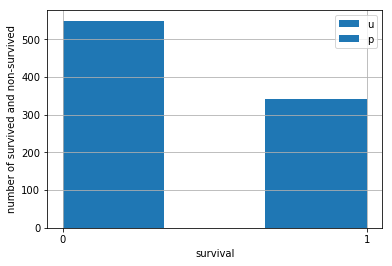

In [9]:
# we can visualize the rate of survival and those who didn't survived. by using pandas.

plt.hist(train_set['Survived'], bins = 3, histtype = 'bar', label = ['survived', 'did not survive'])
plt.grid()
plt.legend('upper right')
plt.xlabel('survival')
plt.xticks([0,1])
plt.ylabel('number of survived and non-survived')
plt.show()
plt.savefig('survival_rate.png')

In [10]:
survival = train_set['Survived']
survival[survival == 0] = 'Death'
survival[survival == 1] = 'survived'
np.unique(survival)

array(['Death', 'survived'], dtype=object)

In [11]:
import seaborn as sns

In [12]:
train_set['Survived'][train_set["Survived"] == 'Death'] = 0
train_set['Survived'][train_set["Survived"] == 'survived'] = 1
np.unique(train_set['Survived'])

array([0, 1], dtype=object)

In [13]:
train_set['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

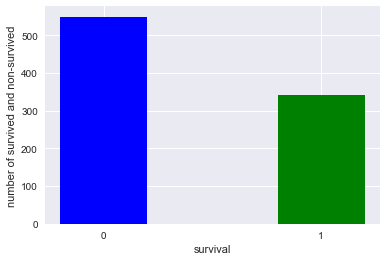

In [14]:
plt.bar([0,1], [549, 342], width = 0.4, color = ['b', 'g'])
plt.xticks([0,1])
plt.xlabel('survival')
plt.ylabel('number of survived and non-survived')
plt.show()
plt.savefig("survival rate")

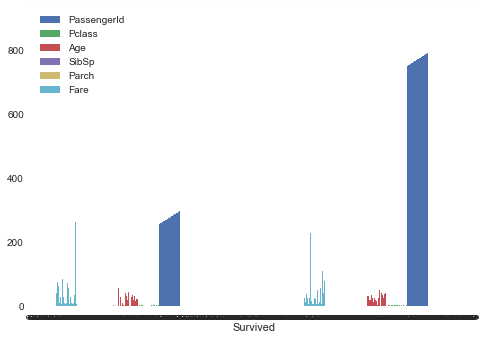

In [15]:
train_set.plot.bar("Survived")
plt.show()

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [17]:
np.unique(train_set['Pclass'])

array([1, 2, 3], dtype=int64)

In [18]:
np.unique(train_set['Sex'])

array(['female', 'male'], dtype=object)

In [19]:
train_set['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
re_train_set = pd.get_dummies(columns = ['Sex', 'Embarked'], data = train_set)
re_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Name           891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(5)
memory usage: 74.0+ KB


In [21]:
re_train_set['Age'] = re_train_set['Age'].fillna(float(train_set['Age'].mode()))

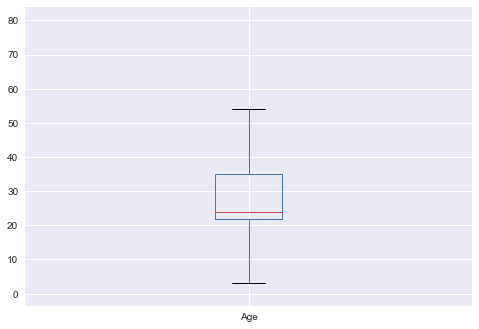

In [22]:
re_train_set.boxplot('Age')
plt.show()
plt.savefig("Age_boxplot")

In [23]:
re_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Name           891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(5)
memory usage: 74.0+ KB


In [24]:
re_train_set = re_train_set.drop('Cabin', axis = 1)
re_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Name           891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(5)
memory usage: 67.1+ KB


In [25]:
re_train_set.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [26]:
train_dataframe = re_train_set.drop(['Name', 'Ticket', 'Survived'], axis = 1)
train_dataframe.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [27]:
train_dataframe.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,28.566970,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.836071,13.199572,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,3.000000,24.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import train_test_split

In [115]:
x = train_dataframe
y = re_train_set['Survived'].astype('int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 18)

In [116]:
scale = MinMaxScaler()
std_scale = StandardScaler()
x_train_std = std_scale.fit_transform(x_train)
x_test_std = std_scale.fit_transform(x_test)

x_train_scale = scale.fit_transform(x_train_std)
x_test_scale = scale.fit_transform(x_test_std)

In [117]:
x_train_scale.tofile("ame.txt")
# set to binary,, the label type of y

In [118]:
y_test.dtype

dtype('int32')

In [121]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
model = gnb.fit(x_train_scale, y_train)
y_pred = gnb.predict(x_test)
accuracy_score(y_pred, y_test)

0.52611940298507465

In [120]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100)
lr.fit(x_train_scale, y_train)
lr.score(x_train_scale, y_train), lr.score(x_test_scale, y_test)

(0.7913322632423756, 0.80597014925373134)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(x_train_scale, y_train)
y_pred = knn.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (knn.score(x_train_scale, y_train),knn.score(x_test_scale, y_test), mse)


0.841091492777 0.809701492537 0.190298507463


In [123]:
for C in [0.00001,0.0001,0.001,0.01,0.1,1,1.0,10,100]:
    lr = LogisticRegression(C = C)
    lr.fit(x_train_scale, y_train)
    print (lr.score(x_train_scale, y_train), "     ", lr.score(x_test_scale, y_test), "     ", C)

0.619582664526       0.608208955224       1e-05
0.619582664526       0.608208955224       0.0001
0.643659711075       0.626865671642       0.001
0.808988764045       0.817164179104       0.01
0.786516853933       0.791044776119       0.1
0.796147672552       0.809701492537       1
0.796147672552       0.809701492537       1.0
0.792937399679       0.809701492537       10
0.791332263242       0.805970149254       100


In [127]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(lr, x_train_scale, y_train, cv = 10)
print (np.mean(score))

0.783481487077


In [128]:
score = cross_val_score(knn, x_train_scale, y_train, cv = 10)
print (np.mean(score))

0.791471716485


In [129]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
y_train_pred = cross_val_predict(lr, x_train_scale, y_train, cv = 10)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print (precision, recall, f1)

0.723684210526 0.696202531646 0.709677419355


In [130]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
y_train_pred = cross_val_predict(knn, x_train_scale, y_train, cv = 10)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print (precision, recall, f1)

0.777202072539 0.632911392405 0.697674418605


In [131]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()
rand.fit(x_train_scale, y_train)
rand.score(x_train_scale, y_train),rand.score(x_test_scale, y_test)
y_pred = rand.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (mse ,accuracy_score(y_test, y_pred))

0.19776119403 0.80223880597


In [132]:
rand = RandomForestClassifier(max_depth = 8, n_estimators = 50)
rand.fit(x_train_scale, y_train)
y_pred = rand.predict(x_test_scale)
mse = mean_squared_error(y_pred, y_test)
print (mse ,accuracy_score(y_test, y_pred))

0.175373134328 0.824626865672


In [160]:
re_test_set = pd.get_dummies(columns = ['Sex', 'Embarked'], data = test_set)

In [175]:
float_value = re_test_set['Age'].median()
float_value = np.float(float_value)

float_value_Fare = re_test_set['Fare'].median()
float_value_Fare = np.float(float_value_Fare)

In [177]:
re_test_set['Age'] = re_test_set['Age'].fillna(float_value)
re_test_set['Fare'] = re_test_set['Fare'].fillna(float_value_Fare)

In [178]:
test_dataframe = re_test_set.drop(['Name', 'Ticket'], axis = 1)
test_dataframe = test_dataframe.drop('Cabin', axis = 1)
test_dataframe.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [179]:
test_dataframe = test_dataframe.fillna(test_dataframe.mode())
np.sum(test_dataframe.isnull())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [180]:
knn_pred = knn.predict(test_dataframe)
lr_pred = lr.predict(test_dataframe)

In [186]:
dict_lr = {'Name': test_set['Name'], 'Survived': lr_pred}
to_pd_lr = pd.DataFrame(dict_lr)
to_pd_lr.to_csv(r"C:\Users\ACER\Desktop\Terragon recruitment\titanic\logistics.csv", index = False)